## Chapter 3

This is a MATLAB Live Editor version of the Fundamentals of Numerical Computation Jupyter Notebooks found at https://tobydriscoll.net/project/fnc/. 

### Example 3.1.1 Worldwide Temperature

Here are 5-year averages of the worldwide temperature anomaly as compared to the 1951-1980 average (source: NASA).

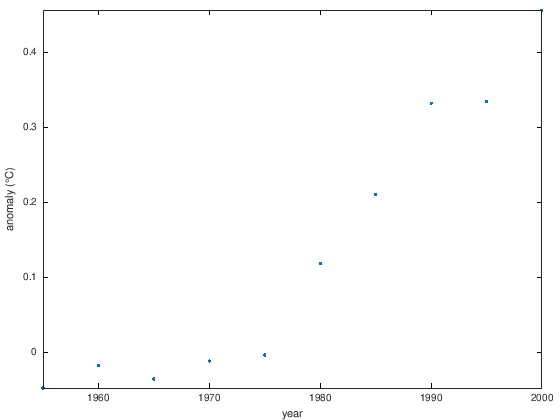

In [1]:
clear
t = (1955:5:2000)';
y = [ -0.0480; -0.0180; -0.0360; -0.0120; -0.0040;
    0.1180; 0.2100; 0.3320; 0.3340; 0.4560 ];
plot(t,y,'.')
xlabel('year'), ylabel('anomaly ({\circ}C)'), axis tight   % ignore this line

A polynomial interpolant can be used to fit the data. Here we build one using a Vandermonde matrix. First, though, we express time as decades since 1950, as it improves the condition number of the matrix. 

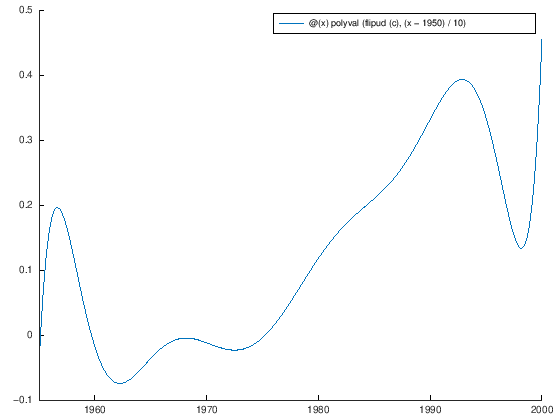

In [2]:
t = (t-1950)/10;  
V = t.^0;      % vector of ones
n = length(t);
for j = 1:n-1
    V(:,j+1) = t.*V(:,j);
end
c = V\y;
p = @(x) polyval(flipud(c),(x-1950)/10);
hold on, fplot(p,[1955 2000])

As you can see, the interpolant does represent the data, in a sense. However it's a crazy-looking curve for the application. Trying too hard to reproduce all the data exactly is known as overfitting.

### Example 3.1.2 Temperature Fit

Here are the 5-year temperature averages again.

In [3]:
year = (1955:5:2000)';
y = [ -0.0480; -0.0180; -0.0360; -0.0120; -0.0040;
    0.1180; 0.2100; 0.3320; 0.3340; 0.4560 ];

The standard best-fit line results from using a linear polynomial that meets the least squares criterion. 

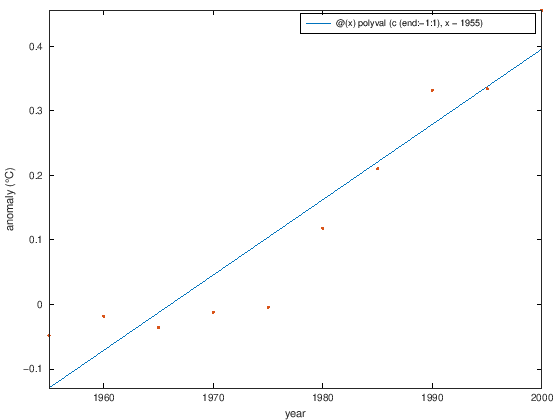

In [4]:
t = year - 1955;             % better matrix conditioning later
V = [ t.^0 t ];    % Vandermonde-ish matrix
c = V\y;
f = @(x) polyval(c(end:-1:1),x-1955);
fplot(f,[1955 2000])
hold on, plot(year,y,'.')
xlabel('year'), ylabel('anomaly ({\circ}C)'), axis tight   % ignore this line

If we use a global cubic polynomial, the points are fit more closely.

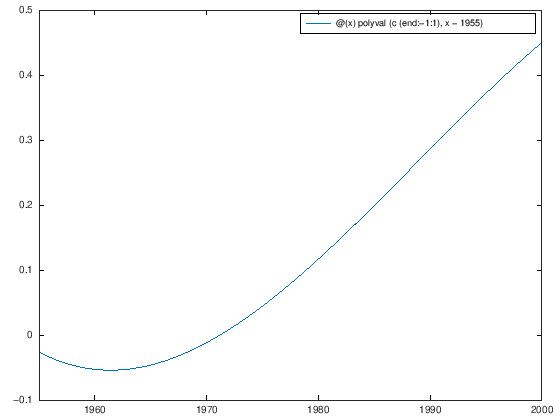

In [5]:
V = [ t.^0 t t.^2 t.^3];    % Vandermonde-ish matrix
c = V\y;   f = @(x) polyval(c(end:-1:1),x-1955);
fplot(f,[1955 2000])

If we were to continue increasing the degree of the polynomial, the residual at the data points would get smaller, but overfitting would increase.

### Example 3.1.3 Pi Rate

Finding numerical approximations to  has fascinated people for millenia. One famous formula is

$\frac{\pi^2}6 = 1+ \frac 1{2^2} + \frac 1{3^2} + \cdots.$

Say  is the sum of the first  terms of the series above, and . Here is a fancy way to compute these sequences in a compact code.

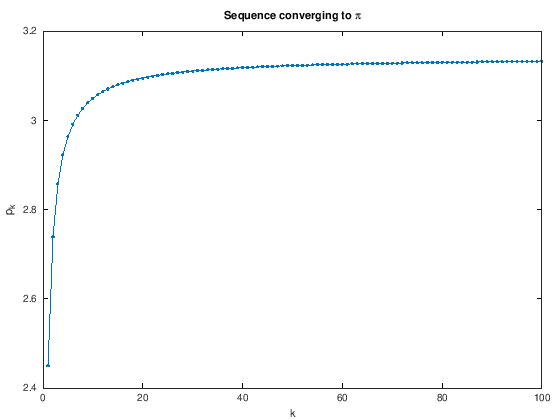

In [6]:
k = (1:100)';
s = cumsum( 1./k.^2 );   % cumulative summation
p = sqrt(6*s);
plot(k,p,'.-')
xlabel('k'), ylabel('p_k')
title('Sequence converging to \pi')

This graph suggests that  but doesn't give much information about the rate of convergence. Let  be the sequence of errors. By plotting the error sequence on a log-log scale, we can see a nearly linear relationship.

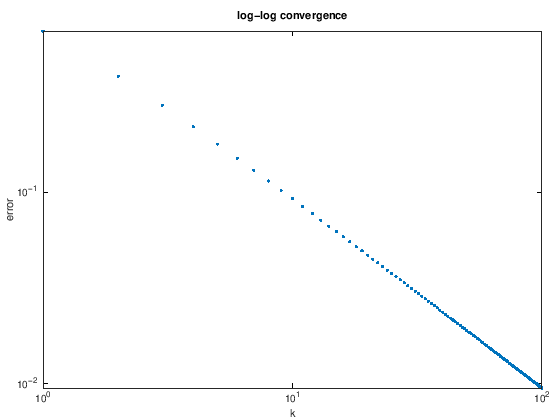

In [7]:
ep = abs(pi-p);    % error sequence
loglog(k,ep,'.'), title('log-log convergence')
xlabel('k'), ylabel('error'),  axis tight

This suggests a power-law relationship where , or .

In [8]:
V = [ k.^0, log(k) ];    % fitting matrix
c = V \ log(ep)          % coefficients of linear fit

c =

  -0.18238
  -0.96741



In terms of the parameters  and  used above, we have 

In [9]:
a = exp(c(1)),  b = c(2),

a =  0.83329
b = -0.96741


It's tempting to conjecture that  asymptotically. Here is how the numerical fit compares to the original convergence curve. 

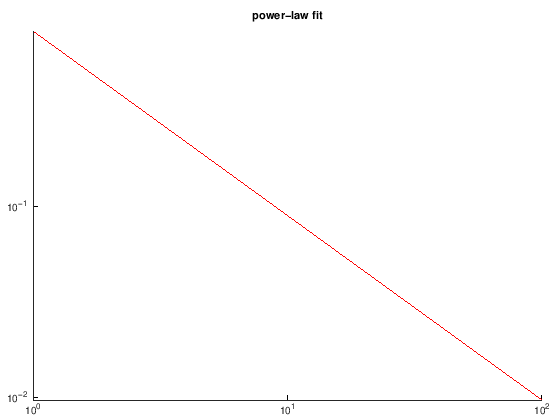

In [10]:
hold on, loglog(k,a*k.^b,'r'), title('power-law fit')
axis tight    % ignore this line

### Example 3.2.1 Normal Instability

Because the functions , , and  are linearly dependent, we should find that the following matrix is somewhat ill-conditioned.

In [11]:
t = linspace(0,3,400)';
A = [ sin(t).^2, cos((1+1e-7)*t).^2, t.^0 ];
kappa = cond(A)

kappa =  18253225.42341


Now we set up an artificial linear least squares problem with a known exact solution that actually makes the residual zero.

In [12]:
x = [1;2;1];
b = A*x;

Using backslash to find the solution, we get a relative error that is about  times machine epsilon.

In [13]:
x_BS = A\b;
observed_err = norm(x_BS-x)/norm(x)
max_err = kappa*eps

observed_err =  0.000000000066419
max_err =  0.0000000040530


If we formulate and solve via the normal equations, we get a much larger relative error. With , we may not be left with more than about 2 accurate digits.

In [14]:
N = A'*A;
x_NE = N\(A'*b);
observed_err = norm(x_NE-x)/norm(x)
digits = -log10(observed_err)

observed_err =  0.014431
digits =  1.8407


### Example 3.3.1 QR Factorization

MATLAB gives direct access to both the full and thin forms of the QR factorization. 

In [15]:
A = magic(5);
A = A(:,1:4);
[m,n] = size(A)

m =  5
n =  4


Here is the full form:

In [16]:
[Q,R] = qr(A);
szQ = size(Q)
szR = size(R)

szQ =

   5   5

szR =

   5   4



We can test that  is orthogonal.

In [17]:
QTQ = Q'*Q
norm(QTQ - eye(m))

QTQ =

   1.0000e+00   5.2681e-17   5.6306e-17  -7.7970e-19  -3.2051e-17
   5.2681e-17   1.0000e+00   3.7275e-17  -3.3699e-17   2.5120e-17
   5.6306e-17   3.7275e-17   1.0000e+00   1.9859e-17  -3.9185e-17
  -7.7970e-19  -3.3699e-17   1.9859e-17   1.0000e+00   1.2459e-16
  -3.2051e-17   2.5120e-17  -3.9185e-17   1.2459e-16   1.0000e+00

ans =    3.6446e-16


With a second input argument given, the thin form is returned.

In [18]:
[Q,R] = qr(A,0);
szQ = size(Q)
szR = size(R)

szQ =

   5   4

szR =

   4   4



Now  cannot be an orthogonal matrix, because it is not even square, but it is still ONC.

In [19]:
Q'*Q - eye(4)

ans =

  -2.2204e-16   5.2681e-17   5.6306e-17  -7.7970e-19
   5.2681e-17   2.2204e-16   3.7275e-17  -3.3699e-17
   5.6306e-17   3.7275e-17  -2.2204e-16   1.9859e-17
  -7.7970e-19  -3.3699e-17   1.9859e-17  -2.2204e-16



### Example 3.4.1 Householder QR Factorization

We will use Householder reflections to produce a QR factorization of the matrix

In [20]:
A = magic(6);
A = A(:,1:4);
[m,n] = size(A);

Our first step is to introduce zeros below the diagonal in column 1. Define the vector 

In [21]:
z = A(:,1);

Applying the Householder definitions gives us

In [22]:
v = z - norm(z)*eye(m,1);
P = eye(m) - 2/(v'*v)*(v*v');   % reflector

By design we can use the reflector to get the zero structure we seek:

In [23]:
P*z

ans =

   56.34714
    0.00000
    0.00000
    0.00000
    0.00000
    0.00000



Now we let 

In [24]:
A = P*A

A =

   5.6347e+01   1.6469e+01   3.0046e+01   3.9097e+01
   8.1185e-16   2.9826e+01   3.6207e+00   1.9159e+01
   6.9389e-15  -1.3464e+01  -3.2919e+01   2.9808e+00
   9.7145e-17   2.2203e+01   2.3989e+01   1.2092e+01
   1.1102e-15  -1.6740e+01   2.0733e-01  -6.4056e+00
   4.4409e-16   3.3101e+01   2.4494e+01   1.0546e+01



We are set to put zeros into column 2. We must not use row 1 in any way, lest it destroy the zeros we just introduced. To put it another way, we can repeat the process we just did on the smaller submatrix

In [25]:
A(2:m,2:n)

ans =

   29.82603    3.62073   19.15944
  -13.46434  -32.91909    2.98083
   22.20275   23.98862   12.09183
  -16.73969    0.20733   -6.40564
   33.10138   24.49431   10.54591



In [26]:
z = A(2:m,2);
v = z - norm(z)*eye(m-1,1);
P = eye(m-1) - 2/(v'*v)*(v*v');   % reflector

We now apply the reflector to the submatrix.

In [27]:
A(2:m,2:n) = P*A(2:m,2:n)

A =

   5.6347e+01   1.6469e+01   3.0046e+01   3.9097e+01
   8.1185e-16   5.4220e+01   3.4880e+01   2.3167e+01
   6.9389e-15   4.6514e-15  -1.5665e+01   5.1928e+00
   9.7145e-17  -5.8221e-15  -4.4630e+00   8.4443e+00
   1.1102e-15   2.5307e-15   2.1658e+01  -3.6556e+00
   4.4409e-16  -5.6876e-15  -1.7923e+01   5.1079e+00



We need two more iterations of this process.

In [28]:
for j = 3:n
    z = A(j:m,j);
    k = m-j+1;
    v = z - norm(z)*eye(k,1);
    P = eye(k) - 2/(v'*v)*(v*v');
    A(j:m,j:n) = P*A(j:m,j:n);
end

We have now reduced the original  to an upper triangular matrix using four orthogonal Householder reflections:

In [29]:
R = A

R =

   5.6347e+01   1.6469e+01   3.0046e+01   3.9097e+01
   8.1185e-16   5.4220e+01   3.4880e+01   2.3167e+01
   6.9389e-15   4.6514e-15   3.2491e+01  -8.9182e+00
   9.7145e-17  -5.8221e-15   9.8925e-16   7.6283e+00
   1.1102e-15   2.5307e-15  -6.6807e-15   2.1528e-15
   4.4409e-16  -5.6876e-15   6.0870e-15  -1.1102e-16

